# YOLOv3

In [1]:
from pathlib import Path
from ultralytics import YOLO
from ultralytics import settings

temp_dir = Path(".temp")
temp_dir.mkdir(exist_ok=True)
# 修改配置
settings.update({
    "datasets_dir": "/media/pc/data/lxw/datasets", # 存储数据集的目录
    "weights_dir": f"{temp_dir}/weights", # 存储模型权重的目录
    "runs_dir": f"{temp_dir}/runs", # 存储实验运行的目录
})
model = YOLO(f"{temp_dir}/yolov5s.pt")

PRO TIP 💡 Replace 'model=.temp/yolov5s.pt' with new 'model=.temp/yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [2]:
model.export(format="torchscript")

Ultralytics 8.3.152 🚀 Python-3.13.4 torch-2.7.1+cu126 CPU (Intel Xeon E5-2678 v3 2.50GHz)
YOLOv5s summary (fused): 84 layers, 9,142,496 parameters, 0 gradients, 24.0 GFLOPs

PyTorch: starting from '.temp/yolov5su.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (17.7 MB)

TorchScript: starting export with torch 2.7.1+cu126...
TorchScript: export success ✅ 2.2s, saved as '.temp/yolov5su.torchscript' (35.4 MB)

Export complete (2.7s)
Results saved to /media/pc/data/lxw/ai/torch-book/doc/ecosystem/ultralytics/.temp
Predict:         yolo predict task=detect model=.temp/yolov5su.torchscript imgsz=640  
Validate:        yolo val task=detect model=.temp/yolov5su.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'.temp/yolov5su.torchscript'

0: 640x480 4 persons, 1 bus, 107.8ms
Speed: 4.7ms preprocess, 107.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


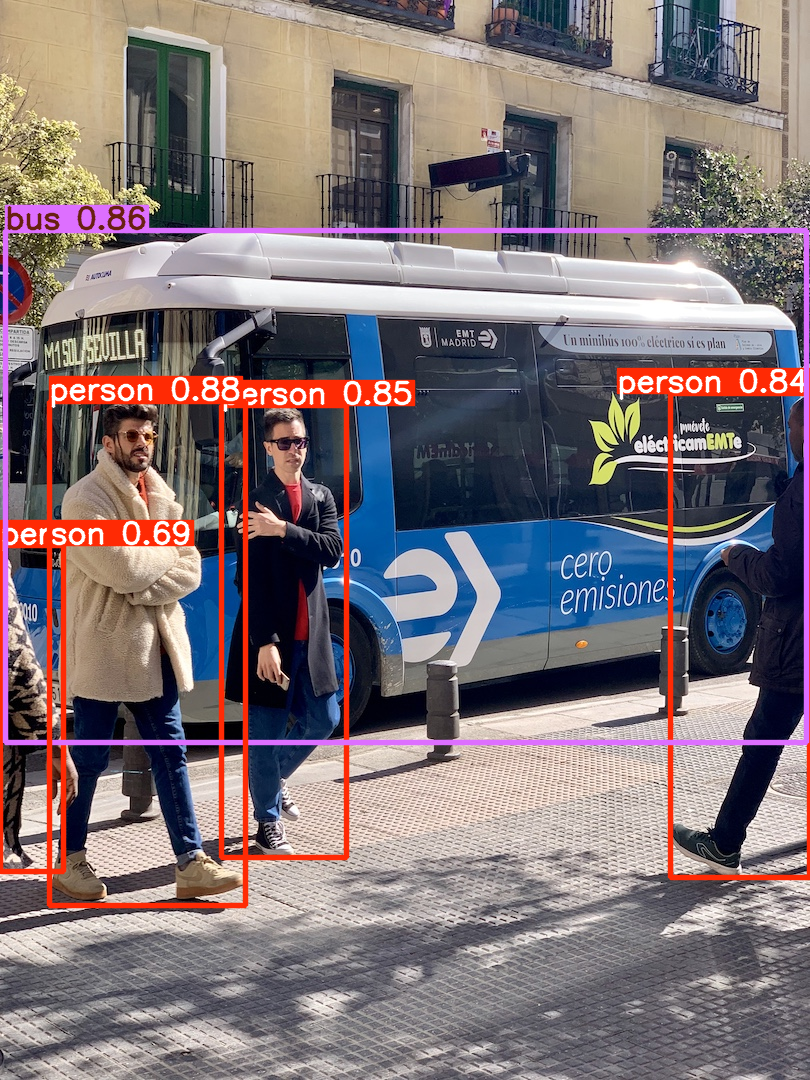

In [13]:
from PIL import Image
import numpy as np
input_path = "ref/images/bus.jpg"
im = Image.open(input_path) #.resize((384, 640))
results = model(np.array(im), conf=0.25)
Image.fromarray(results[0].plot())#.resize((320, 208))

In [18]:
results[0].summary()

[{'name': 'person',
  'class': 0,
  'confidence': 0.87957,
  'box': {'x1': 49.54412, 'y1': 401.83624, 'x2': 245.81351, 'y2': 905.44177}},
 {'name': 'bus',
  'class': 5,
  'confidence': 0.86011,
  'box': {'x1': 5.27771, 'y1': 230.07005, 'x2': 806.26935, 'y2': 742.63336}},
 {'name': 'person',
  'class': 0,
  'confidence': 0.85335,
  'box': {'x1': 221.00658, 'y1': 405.34698, 'x2': 346.45877, 'y2': 857.38855}},
 {'name': 'person',
  'class': 0,
  'confidence': 0.84384,
  'box': {'x1': 670.32434, 'y1': 393.94092, 'x2': 809.4129, 'y2': 877.77283}},
 {'name': 'person',
  'class': 0,
  'confidence': 0.68966,
  'box': {'x1': 0.14919, 'y1': 545.73053, 'x2': 63.41952, 'y2': 871.55554}}]